In [1]:
import chainladder as cl
from bayesianchainladder import BayesianChainLadderGLM
import arviz as az

# Load a sample triangle
clrd = cl.load_sample("clrd")
triangle = clrd.loc[("New Jersey Manufacturers Grp", "wkcomp"), "CumPaidLoss"]

# Fit the Bayesian chain ladder model
model = BayesianChainLadderGLM(
    formula="incremental ~ 1 + C(origin) + C(dev)",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model.fit(triangle)

# Get reserve summary
print(model.summary())

# Access posterior samples
reserve_samples = model.sample_reserves(n_samples=1000)


Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, C(origin), C(dev)]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


          Ultimate                                                     IBNR  \
      paid_to_date          mean           std        median           mean   
1989      162903.0  1.663492e+05    285.400137  1.663320e+05    3446.163054   
1990      176346.0  1.845195e+05    456.740191  1.845038e+05    8173.522732   
1991      187266.0  2.024173e+05    694.605968  2.023917e+05   15151.341672   
1992      189506.0  2.122649e+05    955.773350  2.122360e+05   22758.854510   
1993      175475.0  2.074232e+05   1312.127634  2.073881e+05   31948.230415   
1994      159972.0  2.055675e+05   1975.089063  2.055376e+05   45595.487449   
1995      122811.0  1.832629e+05   2887.561523  1.832003e+05   60451.948801   
1996       92242.0  1.734402e+05   4549.756509  1.732717e+05   81198.174928   
1997       43962.0  1.506398e+05   8312.708787  1.502234e+05  106677.804585   
Total    1310483.0  1.685885e+06  11897.889180  1.685737e+06  375401.528146   

                                    
              

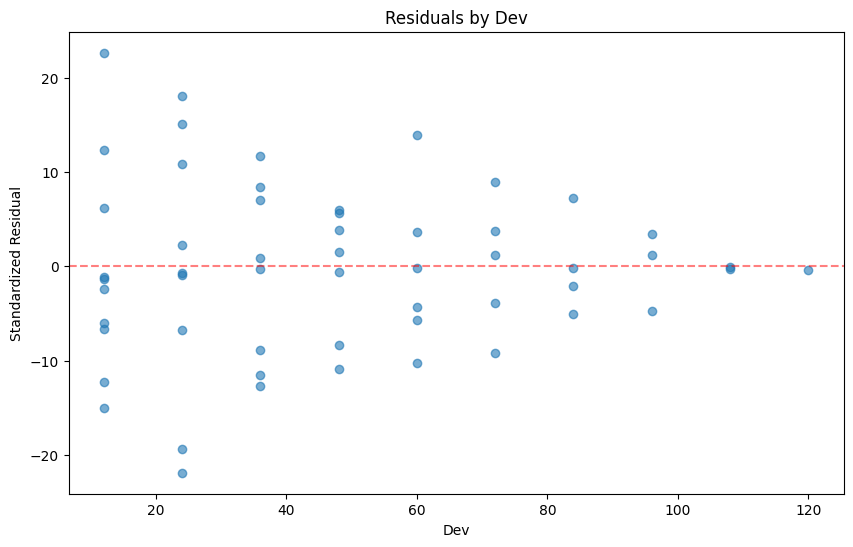

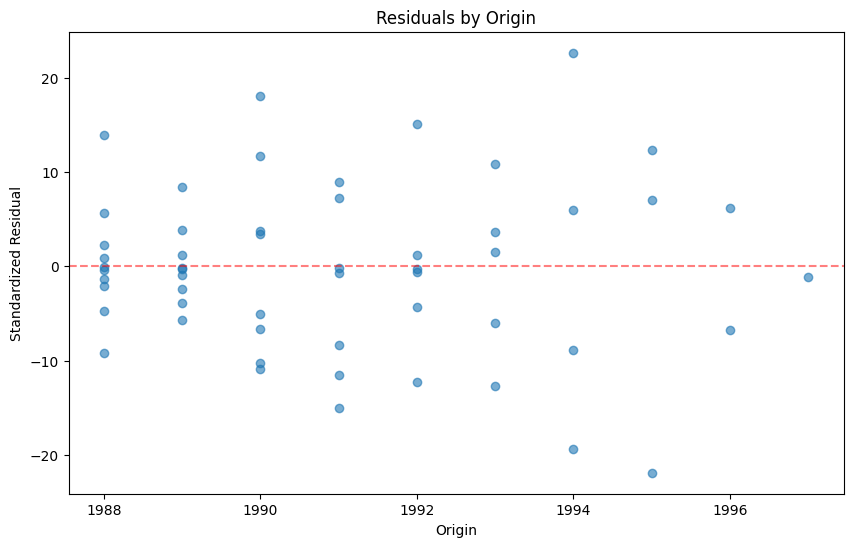

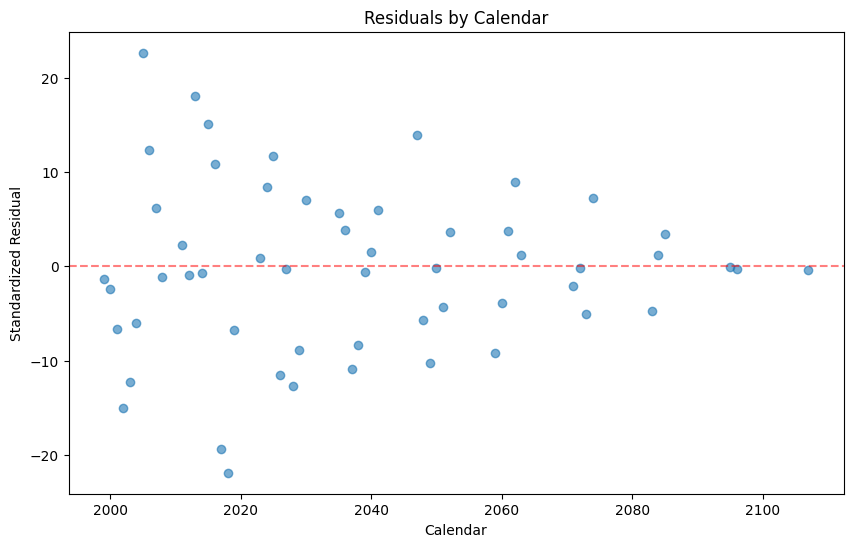

In [2]:
from bayesianchainladder import (
    plot_trace,
    plot_ppc,
    plot_reserve_distribution,
    plot_residuals,
    plot_heatmap_residuals,
    plot_development_pattern
)

fig, ax = plot_residuals(model, by="dev")
fig, ax = plot_residuals(model, by="origin")
fig, ax = plot_residuals(model, by="calendar")

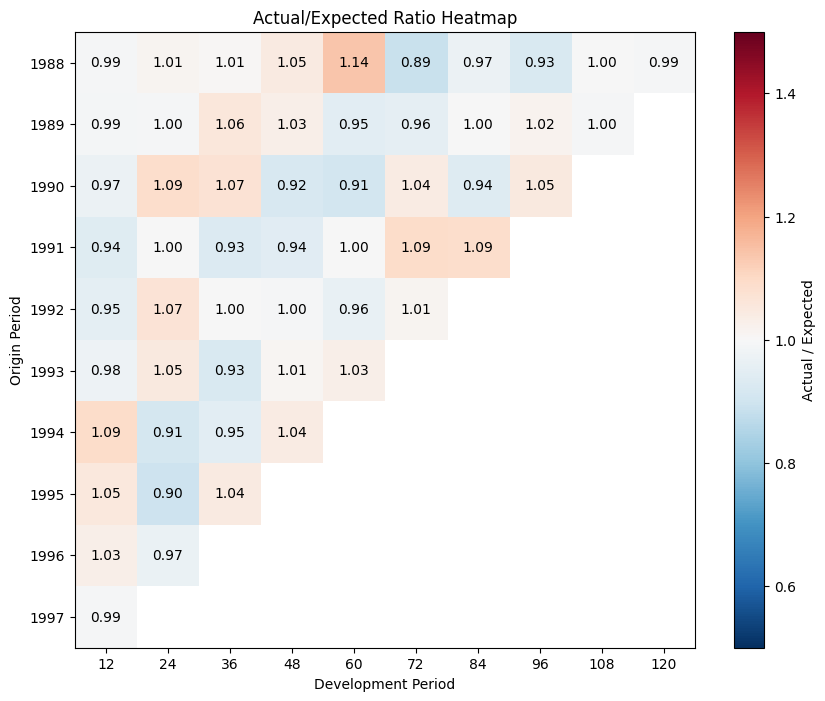

In [3]:
fig, ax = plot_heatmap_residuals(model)

In [4]:
model.ibnr_

,mean,std,median,5%,25%,75%,95%
origin,,,,,,,
1989,3446.163054,285.400137,3428.955289,3004.978878,3251.096813,3620.506830,3950.039079
1990,8173.522732,456.740191,8157.806991,7459.150927,7870.646000,8465.420919,8951.834972
1991,15151.341672,694.605968,15125.709034,14066.193268,14681.623957,15587.634016,16336.197024
1992,22758.854510,955.773350,22730.003830,21219.249746,22118.427065,23380.526857,24374.678972
1993,31948.230415,1312.127634,31913.123162,29864.244197,31064.114870,32787.845699,34178.001648
1994,45595.487449,1975.089063,45565.556274,42472.991399,44264.360685,46870.473589,48898.402109
1995,60451.948801,2887.561523,60389.315480,55795.938421,58516.597640,62316.332626,65308.219082
1996,81198.174928,4549.756509,81029.713224,74109.723634,78081.843381,84161.668606,88904.591188
1997,106677.804585,8312.708787,106261.442910,93650.395951,100994.697363,111896.359790,120856.256632


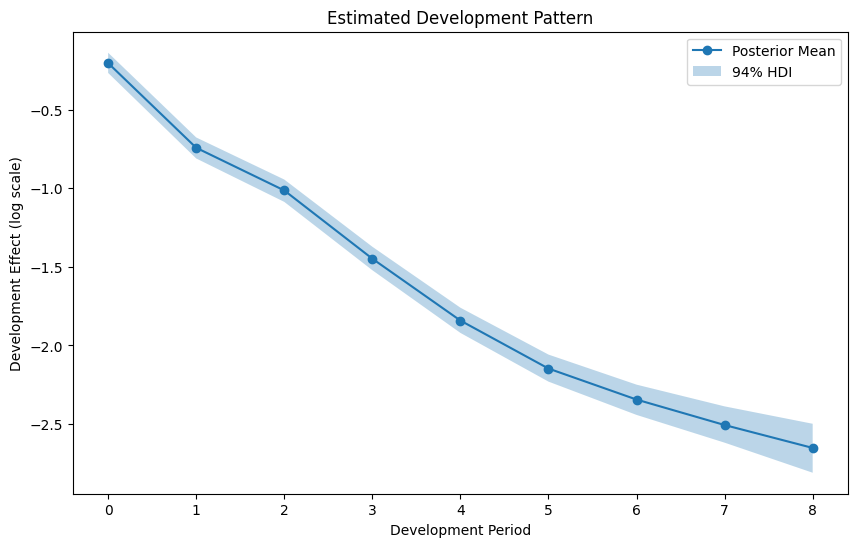

In [5]:
fig, ax = plot_development_pattern(model)

In [6]:
from bayesianchainladder import extract_parameter_summary

extract_parameter_summary(model.idata, var_names=["Intercept", "origin", "dev"], filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.647,0.035,10.580,10.713,0.001,0.001,2093.0,3111.0,1.0
C(origin)[1989],0.146,0.034,0.082,0.209,0.001,0.000,3999.0,5310.0,1.0
C(origin)[1990],0.241,0.036,0.176,0.311,0.001,0.000,3937.0,5126.0,1.0
C(origin)[1991],0.370,0.038,0.302,0.443,0.001,0.000,3975.0,4909.0,1.0
C(origin)[1992],0.391,0.040,0.316,0.466,0.001,0.001,3985.0,4814.0,1.0
C(origin)[1993],0.370,0.042,0.291,0.449,0.001,0.000,4245.0,4973.0,1.0
C(origin)[1994],0.355,0.045,0.272,0.443,0.001,0.001,4276.0,5074.0,1.0
C(origin)[1995],0.246,0.051,0.151,0.344,0.001,0.001,4090.0,4734.0,1.0
C(origin)[1996],0.187,0.060,0.074,0.297,0.001,0.001,4743.0,5007.0,1.0
C(origin)[1997],0.047,0.081,-0.112,0.192,0.001,0.001,5161.0,5202.0,1.0


In [ ]:
# Fit the Bayesian chain ladder model
model_spline = BayesianChainLadderGLM(
    formula="incremental ~ 1 + C(origin) + bs(dev, df=5)",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model_spline.fit(triangle)

# Get reserve summary
model_spline.summary()

Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, bs(origin, df=5), bs(dev, df=5)]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


Ultimate                                                     IBNR  \
      paid_to_date          mean           std        median           mean   
1989      162903.0  1.665754e+05    314.565959  1.665532e+05    3672.400689   
1990      176346.0  1.846692e+05    498.854306  1.846472e+05    8323.152519   
1991      187266.0  2.018530e+05    644.255414  2.018378e+05   14586.981470   
1992      189506.0  2.123524e+05    890.136522  2.123295e+05   22846.404171   
1993      175475.0  2.085386e+05   1136.395496  2.085095e+05   33063.558316   
1994      159972.0  2.053562e+05   1545.711431  2.053340e+05   45384.190603   
1995      122811.0  1.830821e+05   2338.615960  1.830513e+05   60271.068779   
1996       92242.0  1.717657e+05   3351.109195  1.716047e+05   79523.747722   
1997       43962.0  1.523371e+05   8655.922735  1.518886e+05  108375.052388   
Total    1310483.0  1.686530e+06  13196.300041  1.685909e+06  376046.556658   

                                    
                std         median  
1989     314.565959    3650.168589  
1990     498.854306    8301.171405  
1991     644.255414   14571.783208  
1992     890.136522   22823.464027  
1993    1136.395496   33034.470283  
1994    1545.711431   45362.045004  
1995    2338.615960   60240.279927  
1996    3351.109195   79362.654732  
1997    8655.922735  107926.567303  
Total  13196.300041  375426.450031

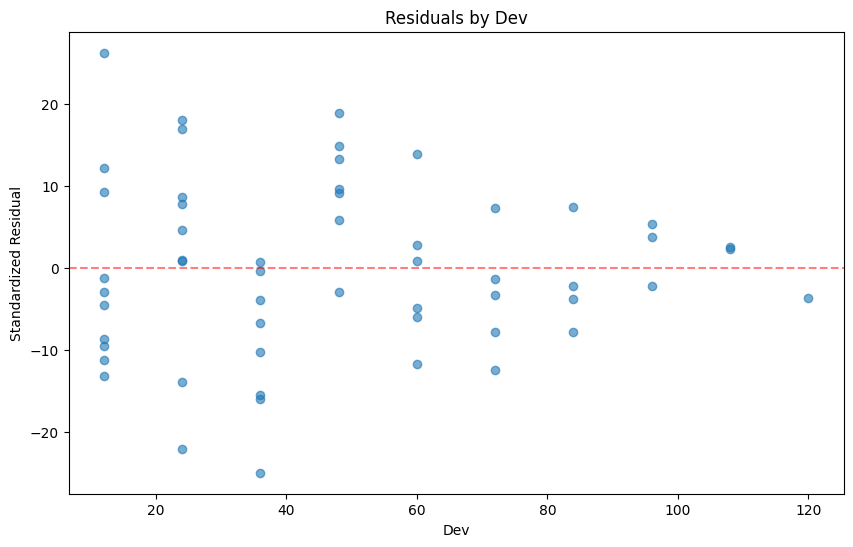

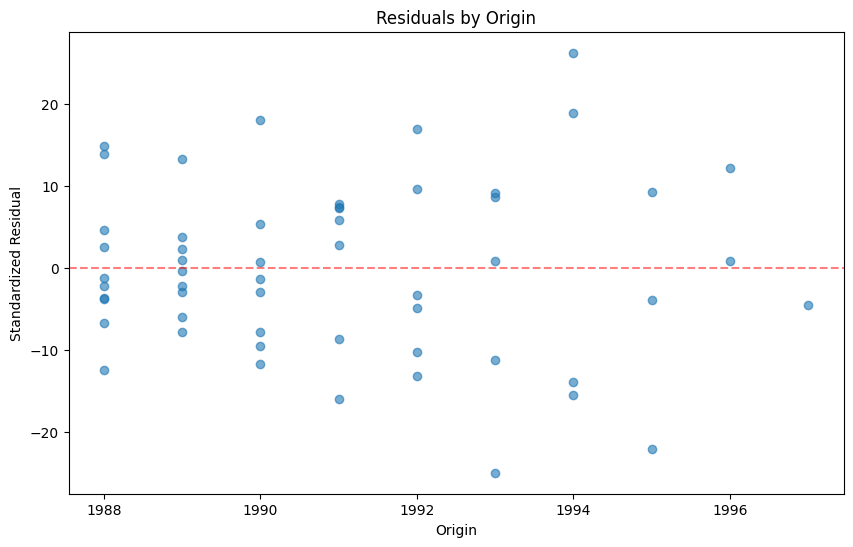

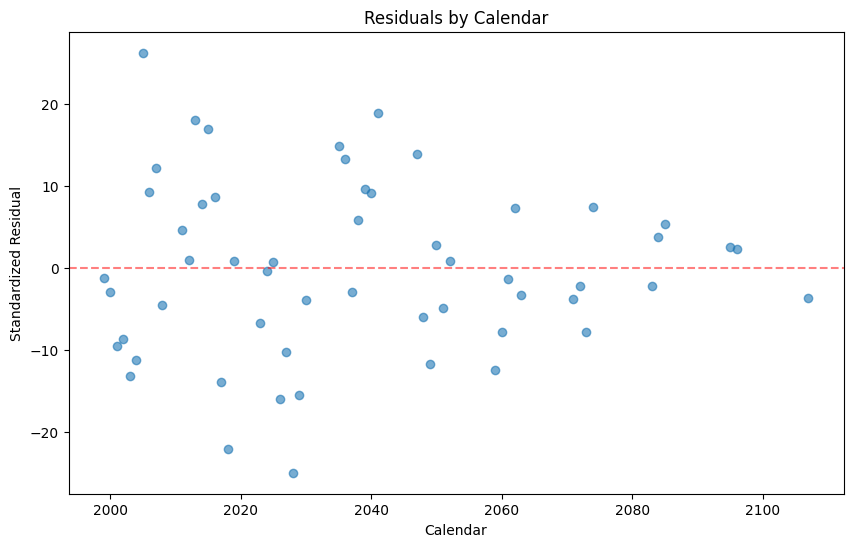

In [16]:
fig, ax = plot_residuals(model_spline, by="dev")
fig, ax = plot_residuals(model_spline, by="origin")
fig, ax = plot_residuals(model_spline, by="calendar")

In [17]:
extract_parameter_summary(model_spline.idata, var_names=["Intercept", "origin", "dev"], filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.646,0.039,10.572,10.719,0.000,0.000,8549.0,6142.0,1.0
"bs(origin, df=5)[0]",0.079,0.078,-0.067,0.226,0.001,0.001,5591.0,5321.0,1.0
"bs(origin, df=5)[1]",0.216,0.074,0.077,0.356,0.001,0.001,5028.0,5495.0,1.0
"bs(origin, df=5)[2]",0.566,0.103,0.372,0.760,0.002,0.001,4457.0,5521.0,1.0
"bs(origin, df=5)[3]",0.222,0.099,0.036,0.407,0.001,0.001,5149.0,5385.0,1.0
"bs(origin, df=5)[4]",0.064,0.083,-0.087,0.230,0.001,0.001,7589.0,5529.0,1.0
"bs(dev, df=5)[0]",0.151,0.077,0.003,0.297,0.001,0.001,6680.0,5597.0,1.0
"bs(dev, df=5)[1]",-0.623,0.074,-0.774,-0.495,0.001,0.001,5875.0,5893.0,1.0
"bs(dev, df=5)[2]",-1.676,0.103,-1.873,-1.483,0.001,0.001,5403.0,5079.0,1.0
"bs(dev, df=5)[3]",-2.646,0.099,-2.832,-2.461,0.001,0.001,6574.0,5691.0,1.0


In [19]:
import arviz as az

az.compare({"Categorical Dev": model.idata, "Spline Dev": model_spline.idata})

/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-r

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Categorical Dev,0,-485.547663,17.224178,0.000000,0.623088,7.457989,0.000000,True,log
Spline Dev,1,-487.322797,10.805200,1.775134,0.376912,7.071362,3.672219,True,log
